# Import

In [1]:
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from cycler import cycler
from matplotlib.lines import Line2D
from inspect import signature
from scipy.optimize import curve_fit

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib notebook

# Read data

In [3]:
#reading routine
#reading routine
def read_data_file(common_folder, folder_in, Rl, N, file_type, spec_type, spec_component, run_files) :
    nb_of_runs = len(run_files)
    for run_index in list(range(nb_of_runs)) :
        folder = common_folder + "rl" + str(Rl) + "_N" + str(N) + "/" + folder_in + "run" + "%01d" % (run_index+1) + "/"
        if (run_files[run_index] < 1000) :
            file = folder + file_type + "_" + spec_type + "_C" + spec_component + "_wi=" + "%03d" % run_files[run_index] + ".table"
        else : 
            file = folder + file_type + "_" + spec_type + "_C" + spec_component + "_wi=" + "%06d" % run_files[run_index] + ".table"
        file_data = []
        print('reading file: ' + file)
        averaging_weight = (run_files[run_index]+1)/(sum(run_files)+nb_of_runs)
        for line in open(file) :
            temp_array_line = []
            if line[0] == '#' :          #skip commented lines
                continue
            else :
                temp_array_line=list(map(float, line.split( )))
                temp_array_line = [t * averaging_weight for t in temp_array_line]
                file_data.append(temp_array_line)  
        if (run_index == 0) : 
            accumulated_data = file_data.copy()
        else : 
            accumulated_data = list(map(lambda l1, l2: [sum(x) for x in zip(l1, l2)], accumulated_data, file_data))
    k = np.array(accumulated_data[0])
    nb_of_modes = np.array(accumulated_data[1])
    average_data = np.ndarray(shape=(len(accumulated_data)-2, k.shape[0]+1), dtype=float)
    for i in list(range(average_data.shape[0])) : 
        average_data[i, :] = np.array(accumulated_data[i+2])
    t = average_data[:,0]
    numpy_file_table = np.array(average_data[:,1:])
    return [k, nb_of_modes, t, numpy_file_table]

In [4]:
common_folder = "/home/gorbunov8a/data/correlations/"
spec_type = "lin"
spec_component = "avg"

In [27]:
Rl = 40
N = 128
folder_in = "4pi/"
#run_windows = [178, 159, 146]
run_windows = [606]

In [6]:
# Rl = 40
# N = 128
# folder_in = "big_box/"
# run_windows = [443]

In [7]:
# Rl = 40
# N = 64
# folder_in = "four_point_corr/"
# run_windows = [241]

In [8]:
# Rl = 40
# N = 64
# folder_in = "test_corr_1alpha/"
# run_windows = [693]

In [9]:
# Rl = 40
# N = 64
# folder_in = "corr_centered/"
# run_windows = [1617]

In [28]:
[k, nb_of_modes, t, corr_real] = read_data_file(common_folder, folder_in, Rl, N, "two_point_corr_complex_real", spec_type, spec_component, run_windows)
[k, nb_of_modes, t, corr_imag] = read_data_file(common_folder, folder_in, Rl, N, "two_point_corr_complex_imag", spec_type, spec_component, run_windows)
[k, nb_of_modes, t, norm_corr] = read_data_file(common_folder, folder_in, Rl, N, "two_point_corr_norms", spec_type, spec_component, run_windows)
[k, nb_of_modes, t, sqr_corr] = read_data_file(common_folder, folder_in, Rl, N, "two_point_corr_sqrs", spec_type, spec_component, run_windows)

reading file: /home/gorbunov8a/data/correlations/rl40_N128/4pi/run1/two_point_corr_complex_real_lin_Cavg_wi=606.table
reading file: /home/gorbunov8a/data/correlations/rl40_N128/4pi/run1/two_point_corr_complex_imag_lin_Cavg_wi=606.table
reading file: /home/gorbunov8a/data/correlations/rl40_N128/4pi/run1/two_point_corr_norms_lin_Cavg_wi=606.table
reading file: /home/gorbunov8a/data/correlations/rl40_N128/4pi/run1/two_point_corr_sqrs_lin_Cavg_wi=606.table


In [29]:
[k, nb_of_modes, t, avg_real] = read_data_file(common_folder, folder_in, Rl, N, "avg_complex_real", spec_type, spec_component, run_windows)
[k, nb_of_modes, t, avg_imag] = read_data_file(common_folder, folder_in, Rl, N, "avg_complex_imag", spec_type, spec_component, run_windows)
[k, nb_of_modes, t, avg_norm] = read_data_file(common_folder, folder_in, Rl, N, "avg_norms", spec_type, spec_component, run_windows)
[k, nb_of_modes, t, var] = read_data_file(common_folder, folder_in, Rl, N, "var", spec_type, spec_component, run_windows)
[k, nb_of_modes, t, var_sqrs] = read_data_file(common_folder, folder_in, Rl, N, "var_sqrs", spec_type, spec_component, run_windows)

reading file: /home/gorbunov8a/data/correlations/rl40_N128/4pi/run1/avg_complex_real_lin_Cavg_wi=606.table
reading file: /home/gorbunov8a/data/correlations/rl40_N128/4pi/run1/avg_complex_imag_lin_Cavg_wi=606.table
reading file: /home/gorbunov8a/data/correlations/rl40_N128/4pi/run1/avg_norms_lin_Cavg_wi=606.table
reading file: /home/gorbunov8a/data/correlations/rl40_N128/4pi/run1/var_lin_Cavg_wi=606.table
reading file: /home/gorbunov8a/data/correlations/rl40_N128/4pi/run1/var_sqrs_lin_Cavg_wi=606.table


# Simulation parameters

In [30]:
N = 64
lmbda = 0.57; eta = 0.511e-1; dissip_rate = 0.145e-6
ekin = 5.34e-5; ik_max = 28
urms = np.sqrt(2.0/3.0*ekin); L = np.sqrt(2.0/3.0*ekin)**3/dissip_rate
t0 = L/urms

# Plotting parameters

In [31]:
plt.rc('axes', labelsize=16)  
plt.rc('axes', titlesize=16)  
plt.rc('legend', fontsize=10)  

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
default_cycler = cycler(cycler(linestyle=['-', '--', ':', '-.'])*cycler(color=colors))
plt.rc('axes', prop_cycle=default_cycler)

In [32]:
nb_of_curves = 7
kmin = 10
kmax = 26
indices_of_k_to_plot = np.int_(np.linspace(kmin, kmax, nb_of_curves))
print(indices_of_k_to_plot)

[10 12 15 18 20 23 26]


# Correlations

In [33]:
# corr_real_comp = (corr_real - avg_real[0,:]*avg_real[:,:])
# corr_imag_comp = (corr_imag - avg_imag[0,:]*avg_imag[:,:])
# corr_norm_comp = (norm_corr - avg_norm[0,:]*avg_norm[:,:])
# corr_sqrs_comp = (sqr_corr - var[0,:]*var[:,:])
# corr_amp = np.absolute(corr_real_comp + 1.0j*corr_imag_comp)
# phase = np.angle(corr_real_comp + 1.0j*corr_imag_comp)

In [34]:
corr_real_comp = (corr_real)
corr_imag_comp = (corr_imag)
corr_norm_comp = (norm_corr)
corr_sqrs_comp = (sqr_corr)
corr_amp = np.absolute(corr_real_comp + 1.0j*corr_imag_comp)
phase = np.angle(corr_real_comp + 1.0j*corr_imag_comp)

<IPython.core.display.Javascript object>


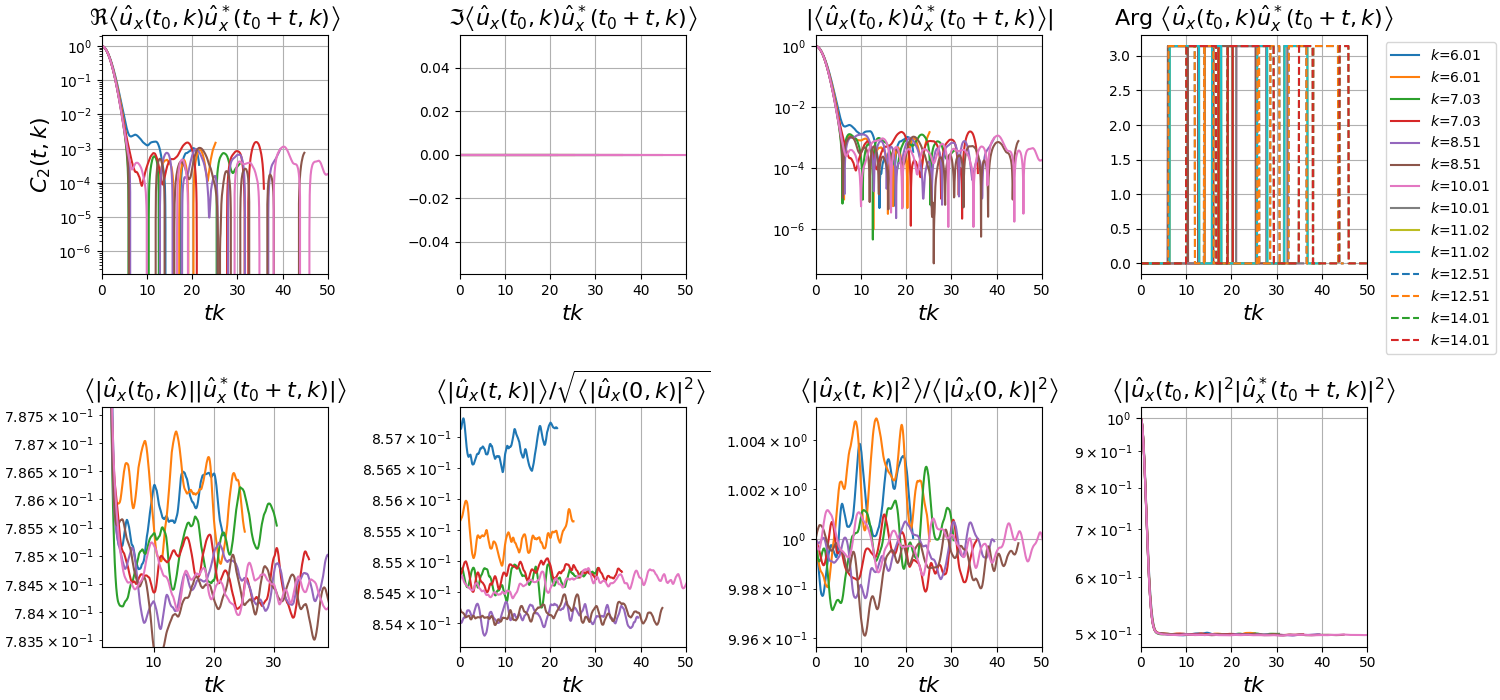

In [36]:
fig, ax = plt.subplots(constrained_layout=True, nrows=2, ncols=4, figsize=(15,7))
for i in range(len(indices_of_k_to_plot)) :
    ik = indices_of_k_to_plot[i]
    x = t/t0*k[ik]*L
    normalization1 = 1.0/np.sqrt(var[0,ik]*var[:,ik])
    normalization1 = 1.0/corr_real_comp[0,ik]
    ax[0,0].plot(x, corr_real_comp[:,ik]*normalization1, label=r'$k$=%2.2f' % k[ik])
    ax[0,1].plot(x, corr_imag_comp[:,ik]*normalization1, label=r'$k$=%2.2f' % k[ik])
    ax[0,2].plot(x, corr_amp[:,ik]*normalization1, label=r'$k$=%2.2f' % k[ik])
    ax[0,3].plot(x, np.unwrap(phase[:,ik]),label=r'$k$=%2.2f' % k[ik])
    ax[0,3].plot(x, phase[:,ik],label=r'$k$=%2.2f' % k[ik])
    
    normalization2 = 1.0/np.sqrt(var[0,ik]*var[:,ik])
    ax[1,0].plot(x, corr_norm_comp[:,ik]*normalization1, '-',label=r'$k$=%2.2f' % k[ik])
    ax[1,1].plot(x, avg_norm[:,:][:,ik]/np.sqrt(var[:,ik]), '-',label=r'$k$=%2.2f' % k[ik])
    ax[1,2].plot(x, (var[:,ik]/var[0,ik]), '-',label=r'$k$=%2.2f' % k[ik])
    
    normalization3 = 1.0/np.sqrt(var_sqrs[:,ik]*var_sqrs[0,ik])
    ax[1,3].plot(x,  (corr_sqrs_comp[:,ik])*normalization3, '-',label=r'$k$=%2.2f' % k[ik])
ax[0,0].set(title=r'$\Re \left<\hat{u}_x(t_0,k) \hat{u}^*_x(t_0+t,k) \right>$',xlabel=r'$tk$', xscale='linear', yscale='log', ylabel=r'$C_2(t, k)$'); ax[0,0].grid()
ax[0,1].set(title=r'$\Im \left<\hat{u}_x(t_0,k) \hat{u}^*_x(t_0+t,k) \right>$', xlabel=r'$tk$', xscale='linear', yscale='linear'); ax[0,1].grid()
ax[0,2].set(title=r'$|\left<\hat{u}_x(t_0,k) \hat{u}^*_x(t_0+t,k) \right>|$', xlabel=r'$tk$', xscale='linear', yscale='log'); ax[0,2].grid()
ax[0,3].set(title=r'Arg $\left<\hat{u}_x(t_0,k) \hat{u}^*_x(t_0+t,k) \right>$', xlabel=r'$tk$', xscale='linear', yscale='linear'); ax[0,3].grid()
ax[1,0].set(title=r'$\left< |\hat{u}_x(t_0,k)| |\hat{u}^*_x(t_0+t,k)| \right>$',xlabel=r'$tk$', xscale='linear', yscale='log'); ax[1,0].grid()
ax[1,1].set(title=r'$\left< |\hat{u}_x(t,k)|\right>/\sqrt{\left< |\hat{u}_x(0,k)|^2\right>}$',xlabel=r'$tk$', xscale='linear', yscale='log'); ax[1,1].grid()
ax[1,2].set(title=r'$\left< |\hat{u}_x(t,k)|^2\right>/\left< |\hat{u}_x(0,k)|^2\right>$',xlabel=r'$tk$', xscale='linear', yscale='log'); ax[1,2].grid()
ax[1,3].set(title=r'$\left< |\hat{u}_x(t_0,k)|^2 |\hat{u}^*_x(t_0+t,k)|^2 \right>$',xlabel=r'$tk$', xscale='linear', yscale='log'); ax[1,3].grid()
ax[0,3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
for (i,j), a in np.ndenumerate(ax):
    a.set(xlim=[0,50])
# pp = PdfPages('Images/Scalar/delta_tk.pdf')
# pp.savefig(bbox_inches='tight')
# pp.close()
plt.show()

<IPython.core.display.Javascript object>


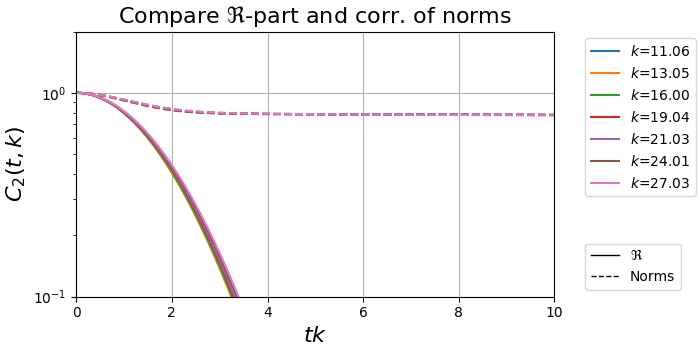

In [18]:
fig, ax = plt.subplots(constrained_layout=True, nrows=1, ncols=1, figsize=(7,3.5))
for i in range(len(indices_of_k_to_plot)) :
    ik = indices_of_k_to_plot[i]
    x = t/t0*k[ik]*L
    ax.plot(x, corr_real_comp[:,ik]/corr_real_comp[0,ik], label=r'$k$=%2.2f' % k[ik], color=colors[i])
    ax.plot(x, corr_norm_comp[:,ik]/corr_norm_comp[0,ik], '--', color=colors[i])
ax.set(xlabel=r'$tk$', xscale='linear', yscale='log', ylabel=r'$C_2(t, k)$'); ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set(xlim=[0,10], ylim=[10e-2,20e-1], title=r'Compare $\Re$-part and corr. of norms')
legend2 = plt.legend([Line2D([0], [0], lw=1, linestyle=ls, color="black") for ls in ['-', '--']], [r'$\Re$', 'Norms'], title_fontsize=12, bbox_to_anchor=(1.05, 0), loc='lower left')
legend1 = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.add_artist(legend2)
# pp = PdfPages('Images/Scalar/delta_tk.pdf')
# pp.savefig(bbox_inches='tight')
# pp.close()
plt.show()

<IPython.core.display.Javascript object>


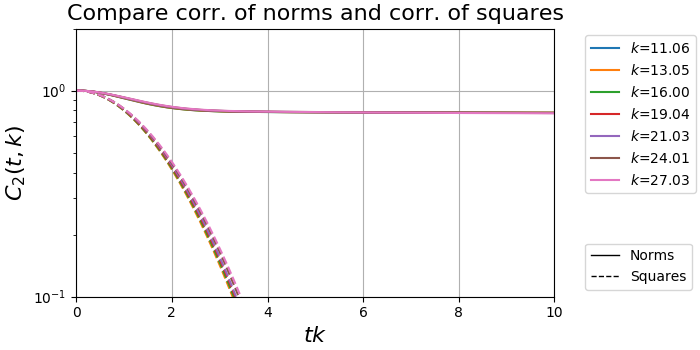

In [19]:
fig, ax = plt.subplots(constrained_layout=True, nrows=1, ncols=1, figsize=(7,3.5))
for i in range(len(indices_of_k_to_plot)) :
    ik = indices_of_k_to_plot[i]
    x = t/t0*k[ik]*L
    ax.plot(x, corr_norm_comp[:,ik]/corr_norm_comp[0,ik], '-', color=colors[i], label=r'$k$=%2.2f' % k[ik])
    ax.plot(x, corr_sqrs_comp[:,ik]/corr_sqrs_comp[0,ik], '--')
ax.set(xlabel=r'$tk$', xscale='linear', yscale='log', ylabel=r'$C_2(t, k)$'); ax.grid()
ax.set(xlim=[0,10], ylim=[10e-2,20e-1], title='Compare corr. of norms and corr. of squares')

legend2 = plt.legend([Line2D([0], [0], lw=1, linestyle=ls, color="black") for ls in ['-', '--']], ['Norms', 'Squares'], title_fontsize=12, bbox_to_anchor=(1.05, 0), loc='lower left')
legend1 = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.add_artist(legend2)
# pp = PdfPages('Images/Scalar/delta_tk.pdf')
# pp.savefig(bbox_inches='tight')
# pp.close()
plt.show()

In [20]:
# fig, ax = plt.subplots(constrained_layout=True, nrows=1, ncols=1, figsize=(7,3.5))
# for i in range(len(indices_of_k_to_plot)) :
#     ik = indices_of_k_to_plot[i]
#     x = t/t0*(k[ik]*L)**1
#     ax.plot(x, (corr_sqrs_comp[:,ik]/corr_sqrs_comp[0,ik])/(corr_norm_comp[:,ik]/corr_norm_comp[0,ik]), '-.', color=colors[i])
# ax.set(xlabel=r'$tk$', xscale='linear', yscale='log', ylabel=r'$C_2(t, k)$'); ax.grid()
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# ax.set(xlim=[0,10])
# # pp = PdfPages('Images/Scalar/delta_tk.pdf')
# # pp.savefig(bbox_inches='tight')
# # pp.close()
# plt.show()

# Fit

In [21]:
# Define the functions to fit
def exp_poly_s(x,a,b,c) :
    return np.exp(a*(x**2) + b*x + c)
def exp_poly_l(x,a,b) :
    return np.exp(a*x + b)
def simple_gaussian(x, a, c):   
    return np.exp(-a * (x)**2.0 + c) 
def simple_gaussian_jacobian(x, a, c):   
    return np.transpose([-(x**2.0)*np.exp(-a * (x)**2.0 + c), np.exp(-a * (x)**2.0 + c)])

In [22]:
def try_to_fit(curve_function, xdata, ydata, jacobian_function=None) :
    number_of_params_of_optimization = len(signature(curve_function).parameters)-1
    coefficients = np.ndarray(shape=(number_of_params_of_optimization), dtype=float) 
    covariance_matrix = np.ndarray(shape=(number_of_params_of_optimization, number_of_params_of_optimization), dtype=float) 
    #try :
    coefficients, covariance_matrix = curve_fit(curve_function, xdata, ydata, jac=jacobian_function, absolute_sigma=False)
#     except :
#         #print('[DEBUG] Failed optimization for ik = ', ik)
#         coefficients.fill(np.nan); covariance_matrix.fill(np.nan)
#     #return [coefficients, covariance_matrix]
    return coefficients

In [23]:
tk1_fit_short = 0.0
tk2_fit_short = 1.0

real_optim_coef = np.ndarray(shape=(len(k), 3), dtype=float)
norm_optim_coef = np.ndarray(shape=(len(k), 3), dtype=float)
sqrs_optim_coef = np.ndarray(shape=(len(k), 3), dtype=float)
for ik in range(len(k)) :
    # fit the 2-point correlation function :
    a_s = 0
    b_s = np.searchsorted(t/t0*k[ik]*L, tk2_fit_short)
    try :
        # polynomial fit
        real_optim_coef[ik, :] = np.polyfit(t[a_s:b_s]/t0, np.log(corr_real_comp[a_s:b_s,ik]/corr_real_comp[0,ik]), 2)
        norm_optim_coef[ik, :] = np.polyfit(t[a_s:b_s]/t0, np.log(corr_norm_comp[a_s:b_s,ik]/corr_norm_comp[0,ik]), 2)
        sqrs_optim_coef[ik, :] = np.polyfit(t[a_s:b_s]/t0, np.log(corr_sqrs_comp[a_s:b_s,ik]/corr_sqrs_comp[0,ik]), 2)
    except :
        print('Failed polyfit for ik = ', ik)
        real_optim_coef[ik,:].fill(np.nan)
        norm_optim_coef[ik,:].fill(np.nan)
        sqrs_optim_coef[ik,:].fill(np.nan)
        continue

In [24]:
# tk1_fit_short = 0.0
# tk2_fit_short = 0.7

# real_optim_coef = np.ndarray(shape=(len(k), 2), dtype=float)
# norm_optim_coef = np.ndarray(shape=(len(k), 2), dtype=float)
# sqrs_optim_coef = np.ndarray(shape=(len(k), 2), dtype=float)
# for ik in range(len(k)) :
#     # fit the 2-point correlation function :
#     a_s = 0
#     b_s = np.searchsorted(t/t0*k[ik]*L, tk2_fit_short)
#     real_optim_coef[ik, :] = try_to_fit(simple_gaussian, t[a_s:b_s]/t0, corr_real_comp[a_s:b_s,ik]/corr_real_comp[0,ik], simple_gaussian_jacobian)
#     norm_optim_coef[ik, :] = try_to_fit(simple_gaussian, t[a_s:b_s]/t0, corr_norm_comp[a_s:b_s,ik]/corr_norm_comp[0,ik], simple_gaussian_jacobian)
#     sqrs_optim_coef[ik, :] = try_to_fit(simple_gaussian, t[a_s:b_s]/t0, corr_sqrs_comp[a_s:b_s,ik]/corr_sqrs_comp[0,ik], simple_gaussian_jacobian)

<IPython.core.display.Javascript object>


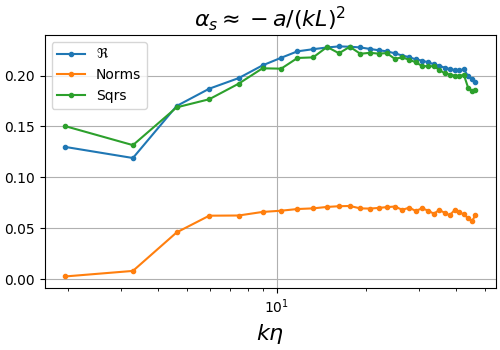

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1,constrained_layout=True,figsize=(5,3.5))

ax.plot(k*L, np.abs(real_optim_coef[:, 0])/(k*L)**2, '.-', label=r'$\Re$')
ax.plot(k*L, np.abs(norm_optim_coef[:, 0])/(k*L)**2, '.-', label='Norms')
ax.plot(k*L, np.abs(sqrs_optim_coef[:, 0])/(k*L)**2, '.-', label='Sqrs')
#ax.plot(k*L, 1.5*np.abs(real_optim_coef[:, 0])/(k*L)**2, '.-', label='1.5 Sqrs', color='silver')
# ax.plot(k*L, 2.0*np.abs(real_optim_coef[:, 0])/(k*L)**2, '.-', label='2.00 Sqrs', color='purple')
ax.set(xscale='log', yscale='linear', title=r'$\alpha_s \approx -a/(kL)^2$', xlabel=r'$k\eta$'); ax.grid()
ax.legend()
plt.show()